# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [4]:
student_number = "400102039"
full_name = "Mohamd Hosein Mehdikhani"
assert student_number and full_name is not None, 'pls input your information'

# Introduction

In this assignment, you will implement PCA and try to interpret it.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [6]:
# Read the dataset
df = pd.read_csv('nutrition.csv')

# Display the first few rows of the dataset
df.head()


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [8]:
# Separate numeric and non-numeric features
numeric_df = df.select_dtypes(include=[np.number])
non_numeric_df = df.select_dtypes(exclude=[np.number])

# Display the numeric features
numeric_df.head()


,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

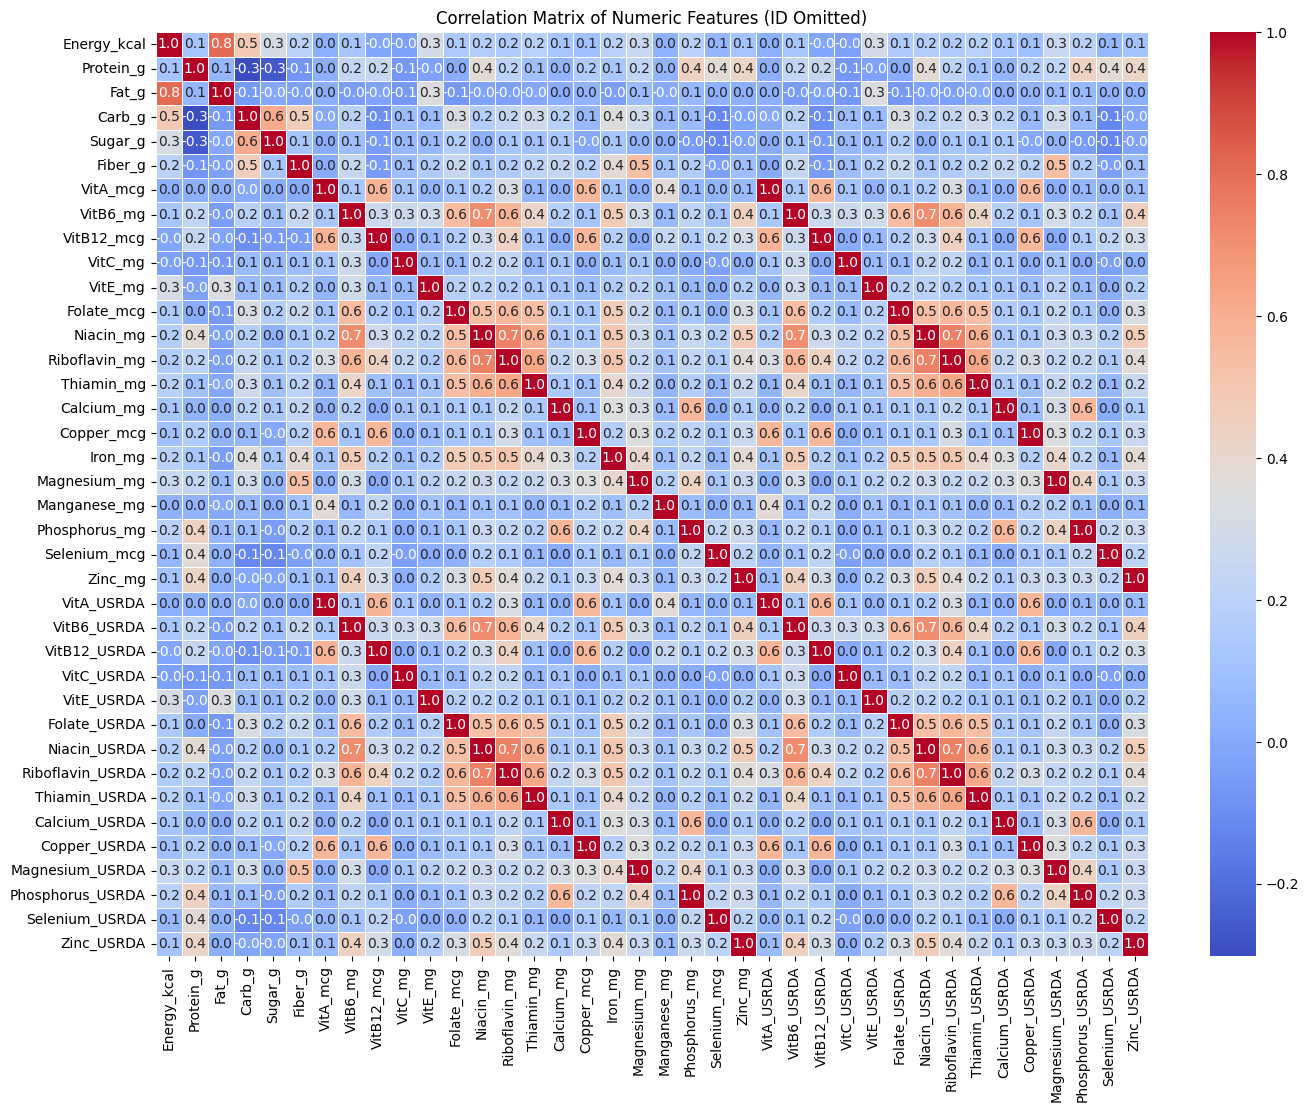

In [9]:
# Assuming 'ID' is the name of the column to be omitted
numeric_df_no_id = numeric_df.drop(columns=['ID'])

# Calculate the correlation matrix
correlation_matrix = numeric_df_no_id.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features (ID Omitted)')
plt.show()



Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

Redundant features: {'VitB6_USRDA', 'Folate_USRDA', 'Zinc_USRDA', 'VitE_USRDA', 'VitB12_USRDA', 'VitA_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'VitC_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Selenium_USRDA', 'Niacin_USRDA', 'Phosphorus_USRDA', 'Calcium_USRDA'}


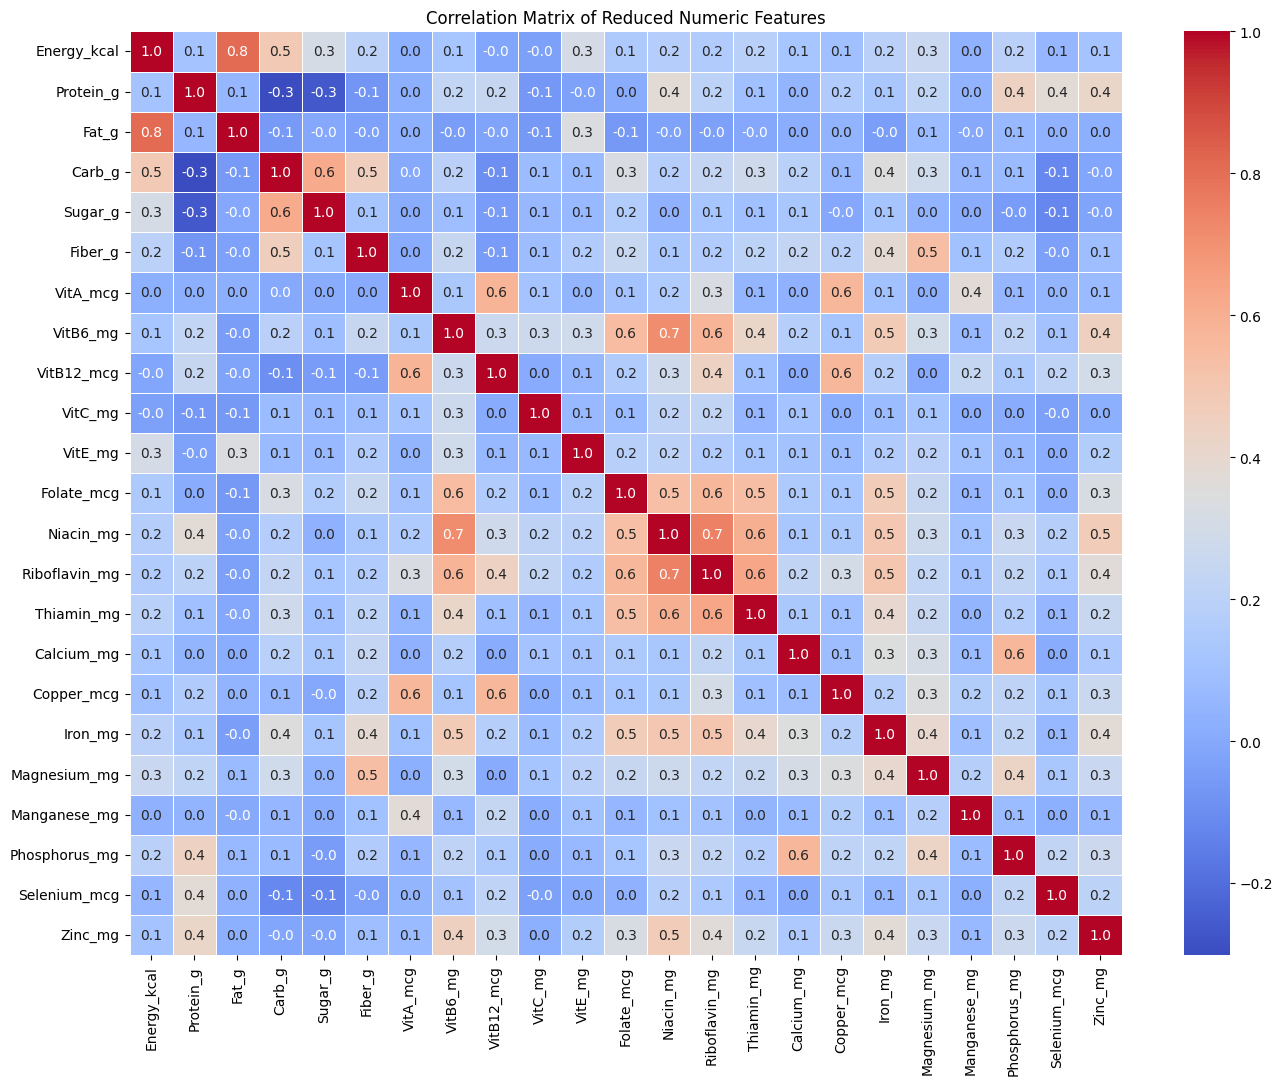

In [10]:
# Step 1: Identify redundant features
correlation_threshold = 0.9
redundant_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            redundant_features.add(correlation_matrix.columns[i])

print(f'Redundant features: {redundant_features}')

# Step 2: Remove redundant features from the dataframe
reduced_df = numeric_df_no_id.drop(columns=redundant_features)

# Display the first few rows of the reduced dataframe
reduced_df.head()

# Step 3: Plot the correlation matrix again
reduced_correlation_matrix = reduced_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(reduced_correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of Reduced Numeric Features')
plt.show()


Explore the dataset by plotting the distribution of each feature separately.

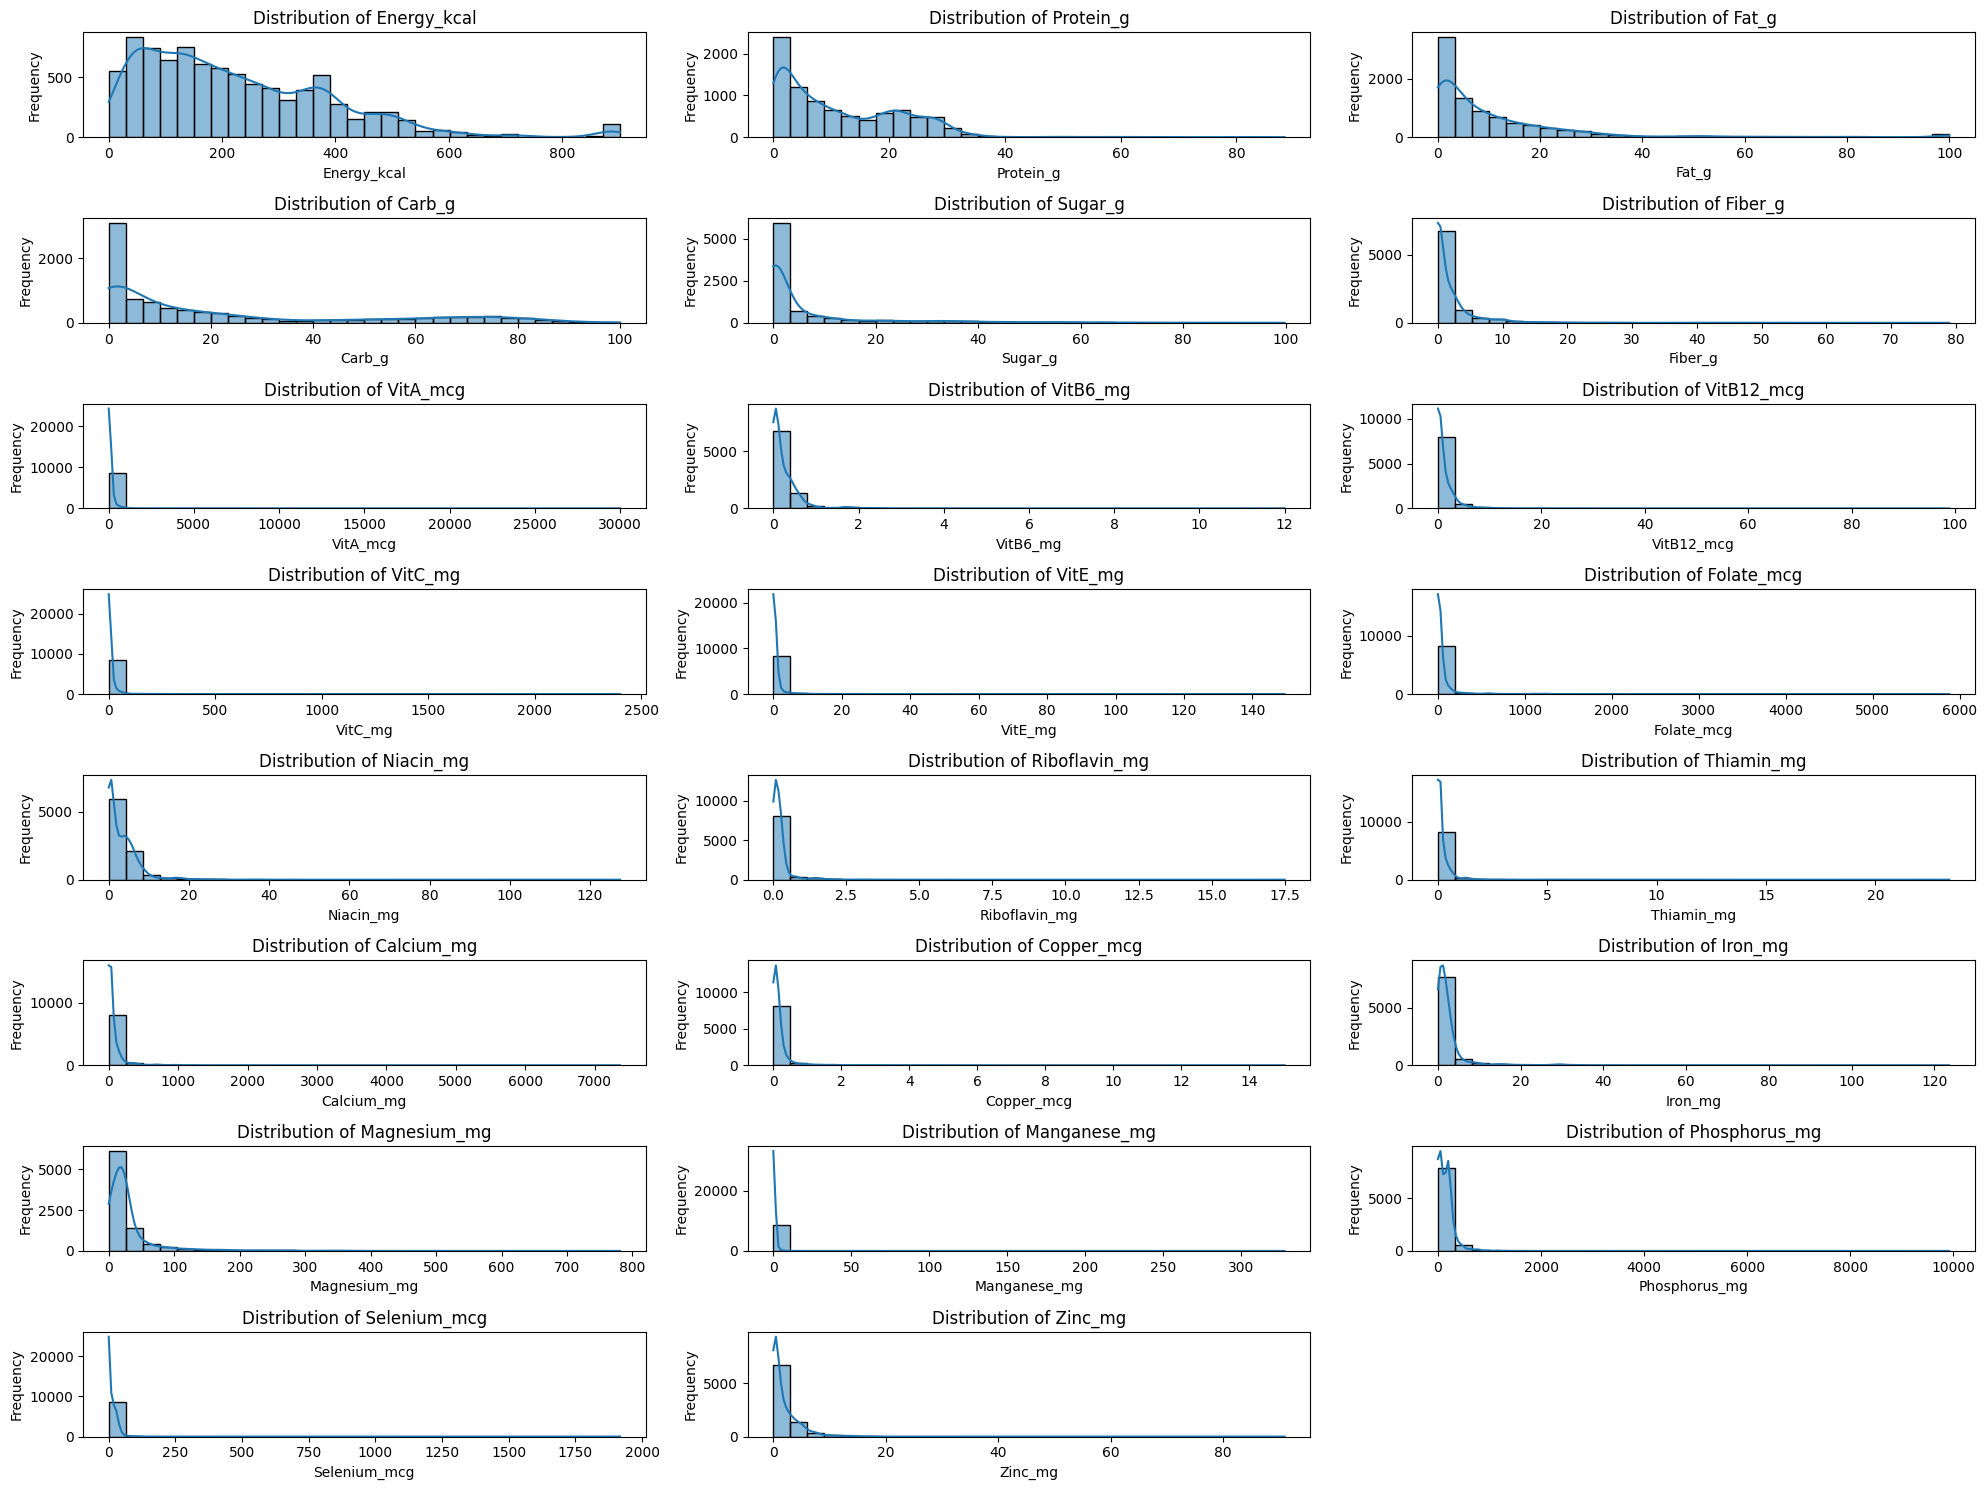

In [11]:
# Plot the distribution of each feature separately
plt.figure(figsize=(20, 15))

# Loop through each feature in the reduced dataframe
for i, column in enumerate(reduced_df.columns, 1):
    plt.subplot(len(reduced_df.columns) // 3 + 1, 3, i)  # Adjust the subplot layout
    sns.histplot(reduced_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [12]:
from scipy.stats import boxcox

# Assuming reduced_df is our pandas DataFrame containing numerical features
df_boxcoxed = pd.DataFrame(index=reduced_df.index)

for column in reduced_df.columns:
    # Add 1 to handle zero and negative values, then apply Box-Cox transformation
    df_boxcoxed[f"{column}_boxcoxed"] = boxcox(reduced_df[column] + 1)[0]

# Display the first few rows of the transformed DataFrame
df_boxcoxed.head()


,Energy_kcal_boxcoxed,Protein_g_boxcoxed,Fat_g_boxcoxed,Carb_g_boxcoxed,Sugar_g_boxcoxed,Fiber_g_boxcoxed,VitA_mcg_boxcoxed,VitB6_mg_boxcoxed,VitB12_mcg_boxcoxed,VitC_mg_boxcoxed,...,Riboflavin_mg_boxcoxed,Thiamin_mg_boxcoxed,Calcium_mg_boxcoxed,Copper_mcg_boxcoxed,Iron_mg_boxcoxed,Magnesium_mg_boxcoxed,Manganese_mg_boxcoxed,Phosphorus_mg_boxcoxed,Selenium_mcg_boxcoxed,Zinc_mg_boxcoxed
0,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.140152,0.0,...,0.031506,0.004927,3.186843,0.000000,0.019689,1.187185,0.000000,5.897452,0.674112,0.083954
1,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.111836,0.0,...,0.031506,0.004927,3.186843,0.015185,0.142210,1.187185,0.003960,5.774520,0.674112,0.048072
2,30.599777,0.253858,4.059063,0.000000,0.000000,0.0,2.711488,0.000998,0.009878,0.0,...,0.004943,0.000997,1.601403,0.000997,0.000000,0.000000,0.000000,1.777189,0.000000,0.009920
3,21.085439,4.504850,3.087499,1.232397,0.360184,0.0,2.509633,0.120684,0.468905,0.0,...,0.191363,0.026682,6.150173,0.035193,0.249940,3.998436,0.008798,19.739039,2.458809,0.896741
4,21.527013,4.665389,3.113172,1.364671,0.365391,0.0,2.573502,0.056903,0.474341,0.0,...,0.183964,0.013442,6.384389,0.022202,0.323005,4.062188,0.011644,20.962339,2.458809,0.889206


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

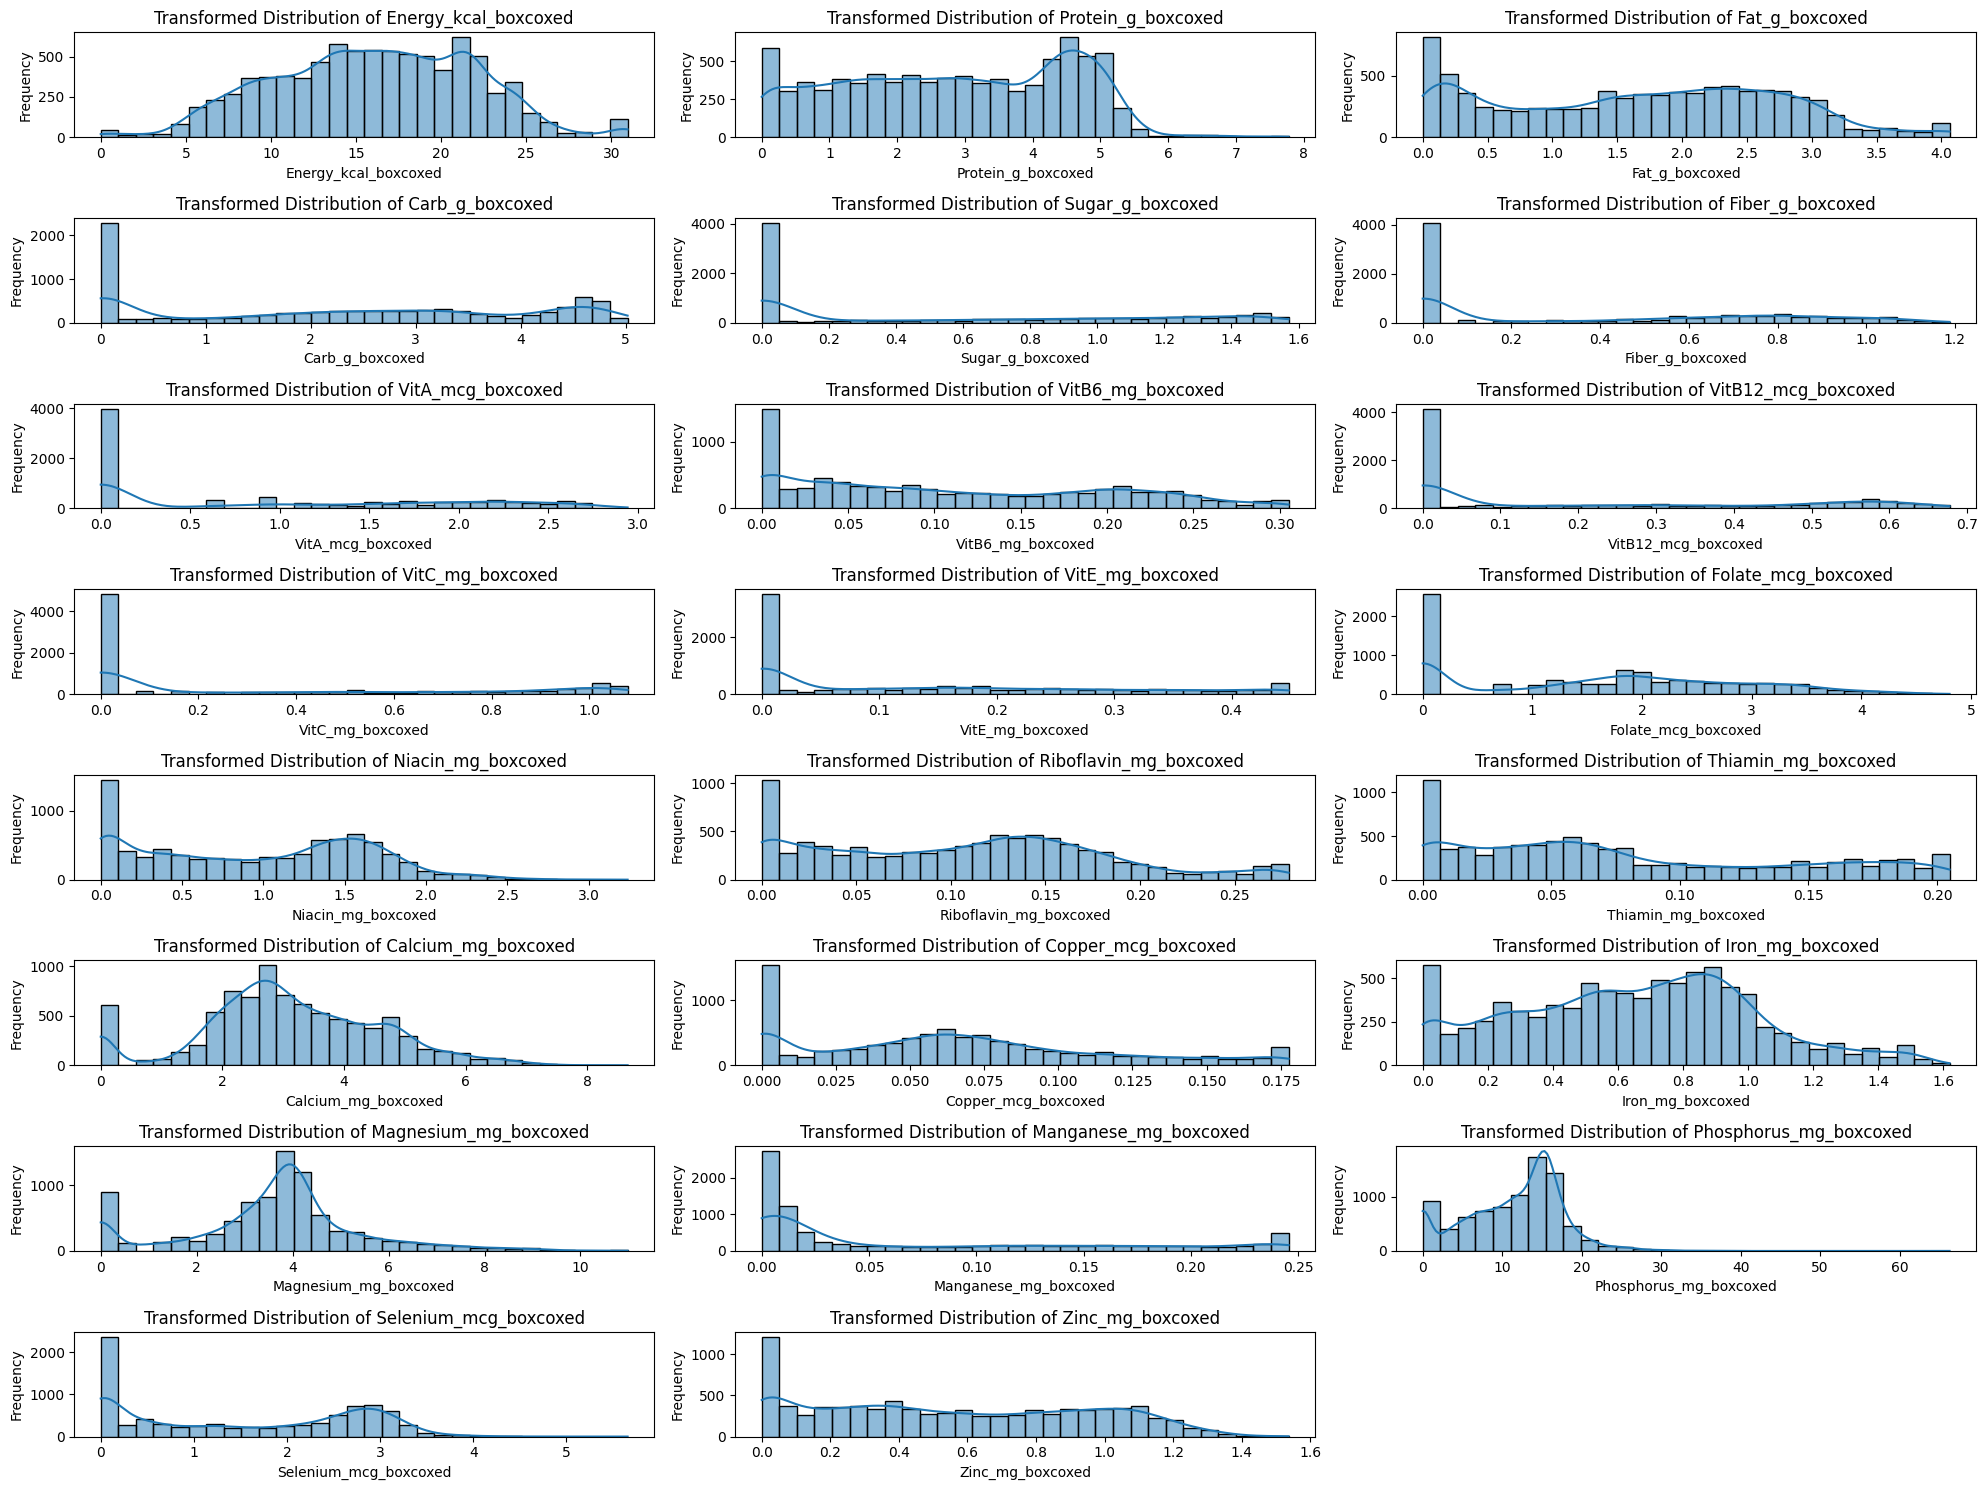

In [13]:
# Plot the distribution of each transformed feature separately
plt.figure(figsize=(20, 15))

for i, column in enumerate(df_boxcoxed.columns, 1):
    plt.subplot(len(df_boxcoxed.columns) // 3 + 1, 3, i)
    sns.histplot(df_boxcoxed[column], kde=True, bins=30)
    plt.title(f'Transformed Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the Box-Cox transformed data
scaled_data = scaler.fit_transform(df_boxcoxed)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_boxcoxed.columns)

# Display the first few rows of the scaled DataFrame
scaled_df.head()
# Calculate mean and standard deviation
# Verify if the data has mean 0 and standard deviation 1
verification_mean = scaled_df.mean()
verification_std = scaled_df.std()

print(f'Verification Mean:\n{verification_mean}\n')
print(f'Verification Standard Deviation:\n{verification_std}')



Verification Mean:
Energy_kcal_boxcoxed      1.607749e-17
Protein_g_boxcoxed       -7.420381e-18
Fat_g_boxcoxed            5.070594e-17
Carb_g_boxcoxed          -1.121302e-16
Sugar_g_boxcoxed         -1.071833e-16
Fiber_g_boxcoxed         -1.319179e-16
VitA_mcg_boxcoxed         1.154282e-16
VitB6_mg_boxcoxed         5.194267e-17
VitB12_mcg_boxcoxed      -6.843241e-17
VitC_mg_boxcoxed         -2.968153e-17
VitE_mg_boxcoxed         -1.978768e-17
Folate_mcg_boxcoxed       1.533545e-16
Niacin_mg_boxcoxed       -9.399150e-17
Riboflavin_mg_boxcoxed    6.595895e-17
Thiamin_mg_boxcoxed      -1.187261e-16
Calcium_mg_boxcoxed       4.287331e-17
Copper_mcg_boxcoxed       1.809749e-16
Iron_mg_boxcoxed          1.863340e-16
Magnesium_mg_boxcoxed    -2.160155e-16
Manganese_mg_boxcoxed     2.440481e-16
Phosphorus_mg_boxcoxed    1.228485e-16
Selenium_mcg_boxcoxed    -4.287331e-17
Zinc_mg_boxcoxed         -8.244868e-17
dtype: float64

Verification Standard Deviation:
Energy_kcal_boxcoxed      1.000058


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [15]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # Centering the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Calculate the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Eigen decomposition of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]
        eigenvalues = eigenvalues[idx]

        # Store first n_components eigenvectors (principal components)
        self.components = eigenvectors[:, :self.n_components]

        # Calculate explained variance ratio
        explained_variance = eigenvalues[:self.n_components]
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        # Centering the data
        X_centered = X - self.mean

        # Project data onto principal components
        transformed_data = np.dot(X_centered, self.components)
        return transformed_data

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [16]:
# Assuming X is your data matrix (features)
X = scaled_df.values  # Assuming scaled_df is your standardized DataFrame

# Instantiate CustomPCA with number of components equal to number of features
pca = CustomPCA(n_components=X.shape[1])

# Fit PCA model to the data
pca.fit(X)

# Transform the data to its principal components
X_transformed = pca.transform(X)

# Get explained variance ratio
explained_variance_ratio = pca.get_explained_variance_ratio()

# Get principal components (eigenvectors)
components = pca.get_components()

# Print results
print("Explained Variance Ratio:", explained_variance_ratio)
print("Principal Components (Eigenvectors):\n", components)


Explained Variance Ratio: [0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
Principal Components (Eigenvectors):
 [[-1.65126285e-01 -4.18501128e-02 -5.08062046e-01 -1.58787185e-01
  -2.04336042e-01  1.80913202e-03  2.30397835e-01 -1.81383994e-01
  -9.68747361e-02 -1.06435860e-01 -1.45702301e-01  1.41609666e-01
  -1.06699262e-01  8.35121589e-02 -1.53289014e-01  1.20599054e-01
  -2.17138385e-01 -5.94332909e-02 -6.74566778e-02  7.75871187e-02
   1.15935559e-01  2.28132085e-01 -5.61042214e-01]
 [-2.86085952e-01  1.96126976e-01 -2.68284159e-02  9.09436327e-02
  -4.61478263e-02  1.49797322e-01 -1.14003881e-01 -2.41629460e-02
   6.86941384e-02  3.00585444e-02  5.56251025e-02  4.82969267e-02
   1.50738589e-01 -3.44909526e-01 -7.02210362e-02  1.83871414e-02
   2.37896749e-01 -1.21523085e-01

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


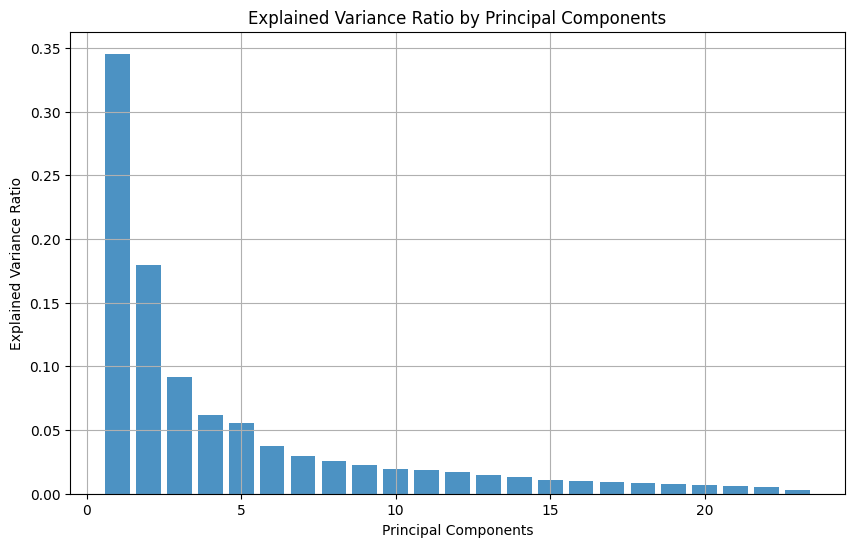

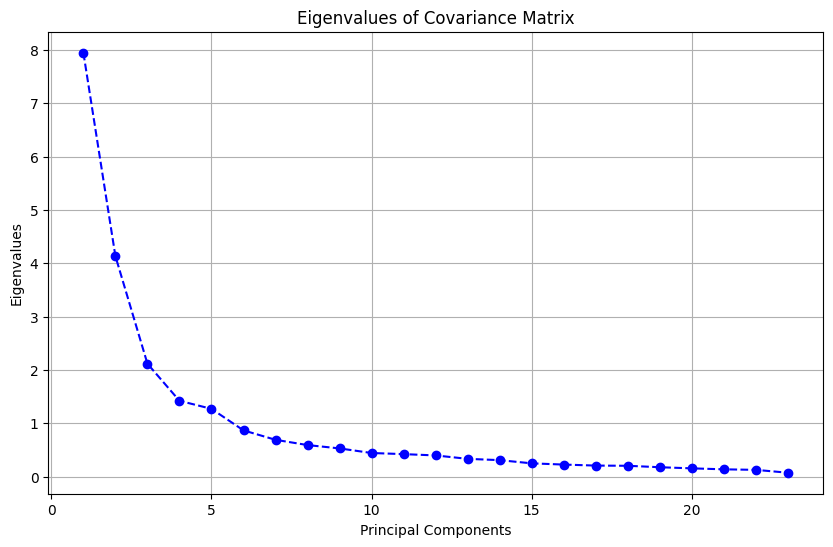

Eigenvalues:
[7.94855764 4.13381409 2.11656465 1.42074871 1.26975574 0.86584592
 0.68921682 0.59043445 0.52777718 0.44166498 0.42069271 0.39598144
 0.33211909 0.30768699 0.24757536 0.22476053 0.20577816 0.20205504
 0.17488325 0.1538837  0.13556003 0.12545178 0.07186085]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None
        self.eigenvalues_ = None  # Added to store eigenvalues

    def fit(self, X):
        # Centering the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Calculate the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Eigen decomposition of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]
        eigenvalues = eigenvalues[idx]

        # Store first n_components eigenvectors (principal components)
        self.components = eigenvectors[:, :self.n_components]

        # Store eigenvalues
        self.eigenvalues_ = eigenvalues

        # Calculate explained variance ratio
        explained_variance = eigenvalues[:self.n_components]
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        # Centering the data
        X_centered = X - self.mean

        # Project data onto principal components
        transformed_data = np.dot(X_centered, self.components)
        return transformed_data

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components

    def plot_variance_ratio(self):
        # Plot explained variance ratio
        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(self.explained_variance_ratio_) + 1), self.explained_variance_ratio_, alpha=0.8, align='center')
        plt.xlabel('Principal Components')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance Ratio by Principal Components')
        plt.grid(True)
        plt.show()

    def plot_eigenvalues(self):
        # Plot eigenvalues
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.eigenvalues_) + 1), self.eigenvalues_, marker='o', linestyle='--', color='b')
        plt.xlabel('Principal Components')
        plt.ylabel('Eigenvalues')
        plt.title('Eigenvalues of Covariance Matrix')
        plt.grid(True)
        plt.show()
# Assuming X is your data matrix (features)
X = scaled_df.values  # Assuming scaled_df is your standardized DataFrame

# Instantiate CustomPCA with number of components equal to number of features
pca = CustomPCA(n_components=X.shape[1])

# Fit PCA model to the data
pca.fit(X)

# Plot explained variance ratio
pca.plot_variance_ratio()

# Plot eigenvalues
pca.plot_eigenvalues()

# Get eigenvalues
eigenvalues = pca.eigenvalues_
print("Eigenvalues:")
print(eigenvalues)


therefore we are going to pick 5 components

In [18]:
# Assuming X is your data matrix (features)
X = scaled_df.values  # Assuming scaled_df is your standardized DataFrame

# Instantiate CustomPCA with 5 components
pca = CustomPCA(n_components=5)

# Fit PCA model to the data
pca.fit(X)

# Get explained variance ratio for the first 5 components
explained_variance_ratio = pca.get_explained_variance_ratio()

# Print total explained variance ratio for the first 5 components
total_variance_ratio = np.sum(explained_variance_ratio)
print(f'Total Explained Variance Ratio for 5 Components: {total_variance_ratio:.2f}')


Total Explained Variance Ratio for 5 Components: 0.73


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [19]:
import pandas as pd

# Example data (replace with your actual data)
# Assuming pca_df is your DataFrame after PCA transformation
# Assuming df contains your original dataset with 'ShortDescrip', 'Descrip' columns

# Extract 'ShortDescrip' and 'Descrip' columns from original dataframe (df)
short_descrip = df['ShortDescrip']
descrip = df['Descrip']

# Instantiate CustomPCA with 5 components
pca = CustomPCA(n_components=5)

# Fit PCA model to the data (assuming scaled_df is your standardized DataFrame)
X = scaled_df.values
pca.fit(X)

# Get transformed data with first 5 components
X_transformed = pca.transform(X)

# Correct signs for components c3, c4, and c5 (if needed)
X_transformed[:, 2:5] *= -1

# Create a new DataFrame with first 5 components and additional columns
component_names = [f'Component_{i+1}' for i in range(pca.n_components)]
pca_df = pd.DataFrame(X_transformed, columns=component_names)

# Adjust IDs starting from 1001
pca_df.index = range(1001, 1001 + len(pca_df))

# Set 'FoodGroup' column to 'Dairy and Egg Products' for all rows
pca_df['FoodGroup'] = 'Dairy and Egg Products'


# Display the first few rows of the new DataFrame
print(pca_df.head())


      Component_1  Component_2  Component_3  Component_4  Component_5  \
1001     2.638414     1.702512     1.283725     3.759546     2.413650   
1002     2.537931     1.550464     1.279816     3.634065     2.492683   
1003     3.751335     2.080190     2.067932     3.668154     2.457203   
1004    -2.000578     1.361858    -0.395834     2.432792     0.887796   
1005    -1.582713     1.321484    -0.238444     2.597599     1.286317   

                   FoodGroup  
1001  Dairy and Egg Products  
1002  Dairy and Egg Products  
1003  Dairy and Egg Products  
1004  Dairy and Egg Products  
1005  Dairy and Egg Products  


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [20]:

principal_components = pca_df[['Component_1', 'Component_2', 'Component_3', 'Component_4', 'Component_5']]


components_corr = principal_components.corr()

# Round the correlation matrix to one decimal place
components_corr_rounded = components_corr.round(1)

# Display the correlation matrix with rounded values
print("Correlation Matrix between Principal Components (rounded to 1 decimal place):")
print(components_corr_rounded)


Correlation Matrix between Principal Components (rounded to 1 decimal place):
             Component_1  Component_2  Component_3  Component_4  Component_5
Component_1          1.0          0.0          0.0          0.0         -0.0
Component_2          0.0          1.0          0.0         -0.0          0.0
Component_3          0.0          0.0          1.0          0.0          0.0
Component_4          0.0         -0.0          0.0          1.0          0.0
Component_5         -0.0          0.0          0.0          0.0          1.0


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

Components shape: (23, 5)
                           PC1       PC2       PC3       PC4       PC5
Energy_kcal_boxcoxed -0.165126 -0.041850 -0.508062 -0.158787 -0.204336
Protein_g_boxcoxed   -0.286086  0.196127 -0.026828  0.090944 -0.046148
Fat_g_boxcoxed       -0.161488  0.123575 -0.409505 -0.282774 -0.266740
Carb_g_boxcoxed       0.033767 -0.414542 -0.250952  0.025185  0.101396
Sugar_g_boxcoxed      0.076132 -0.295640 -0.208651 -0.279657  0.264262


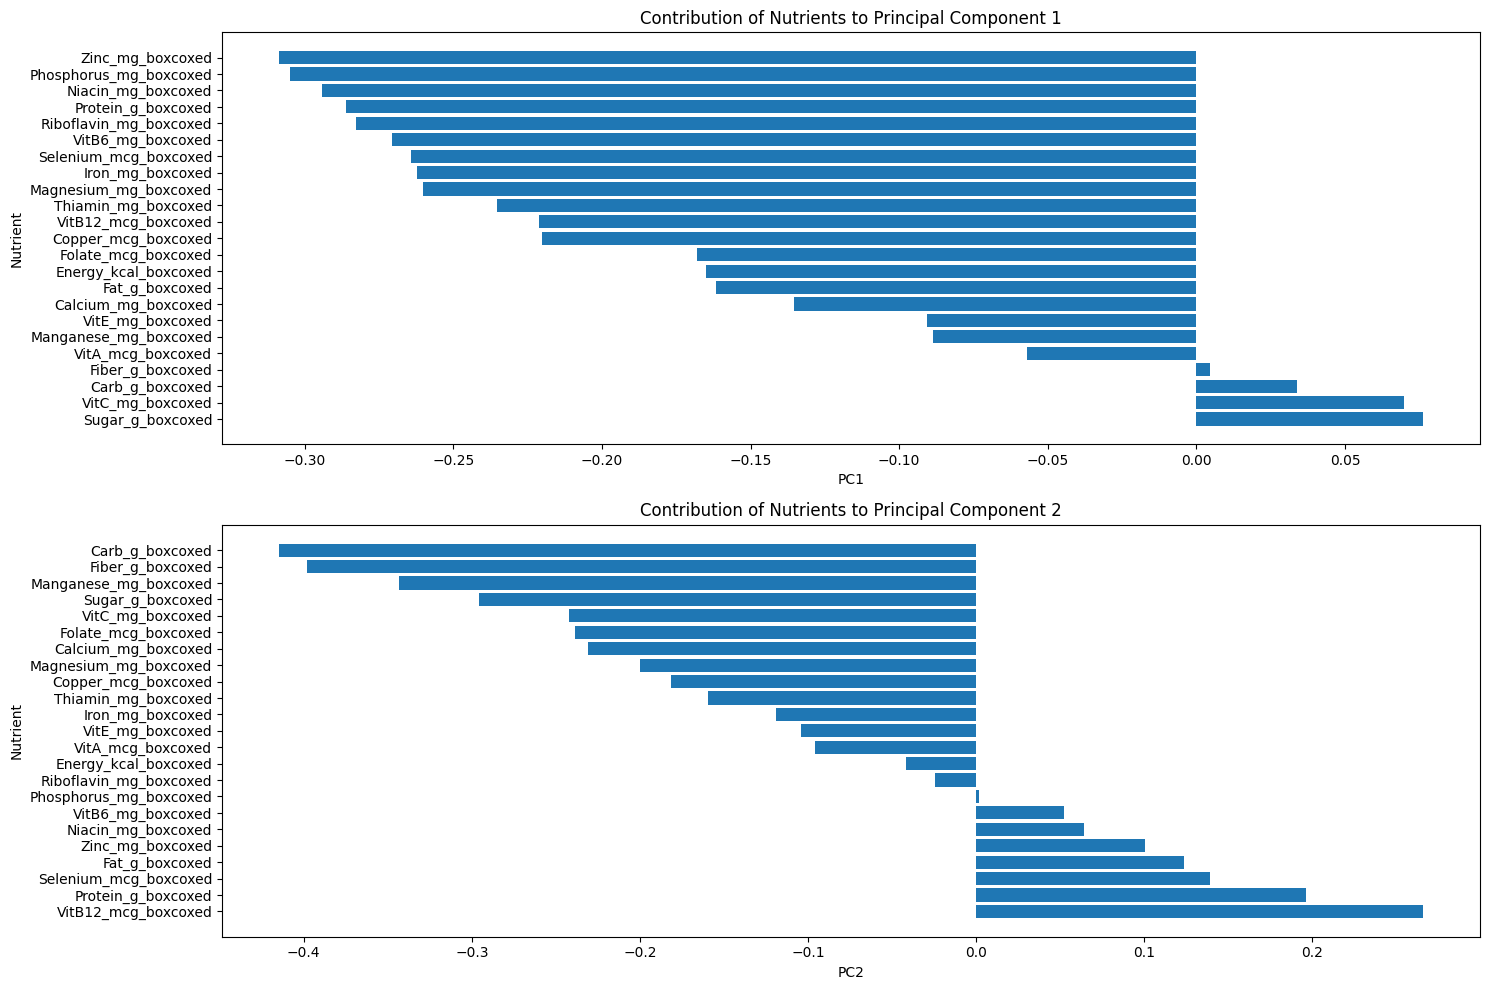

In [21]:
# Ensure matplotlib inline for Jupyter Notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming components is the matrix of eigenvectors obtained from the PCA model
components = pca.get_components()

# Debugging: Print the shape of the components array
print(f"Components shape: {components.shape}")

# Ensure that we have at least two components
if components.shape[1] < 2:
    print("Not enough components to plot the first two component vectors.")
else:
    # Create a DataFrame for the eigenvectors
    eigenvectors_df = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(components.shape[1])], index=scaled_df.columns)

    # Debugging: Print the first few rows of the eigenvectors DataFrame
    print(eigenvectors_df.head())

    # Sort contributions by value for PC1
    pc1_sorted = eigenvectors_df['PC1'].sort_values(ascending=False)

    # Sort contributions by value for PC2
    pc2_sorted = eigenvectors_df['PC2'].sort_values(ascending=False)

    # Plot the contribution of nutrients to the first principal component
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 1, 1)
    plt.barh(pc1_sorted.index, pc1_sorted.values)
    plt.ylabel('Nutrient')
    plt.xlabel('PC1')
    plt.title('Contribution of Nutrients to Principal Component 1')

    # Plot the contribution of nutrients to the second principal component
    plt.subplot(2, 1, 2)
    plt.barh(pc2_sorted.index, pc2_sorted.values)
    plt.ylabel('Nutrient')
    plt.xlabel('PC2')
    plt.title('Contribution of Nutrients to Principal Component 2')

    plt.tight_layout()
    plt.show()


### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">The plots show the contribution (loadings) of each nutrient to the first and second principal components.

    First Principal Component (PC1): Nutrients with the highest absolute loadings are the most influential in defining this component. Positive and negative loadings indicate the direction of influence.
    Second Principal Component (PC2): Similarly, nutrients with the highest absolute loadings here are the most influential for this component, providing different insights compared to PC1.

Overall, these plots help identify which nutrients contribute the most to the variance captured by each principal component, highlighting their relative importance and potential correlations.</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

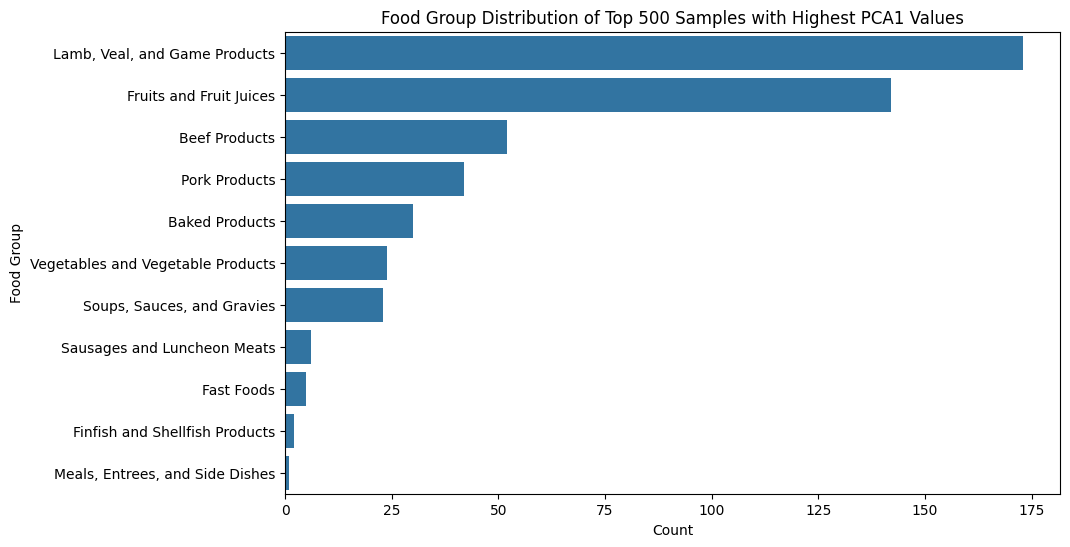

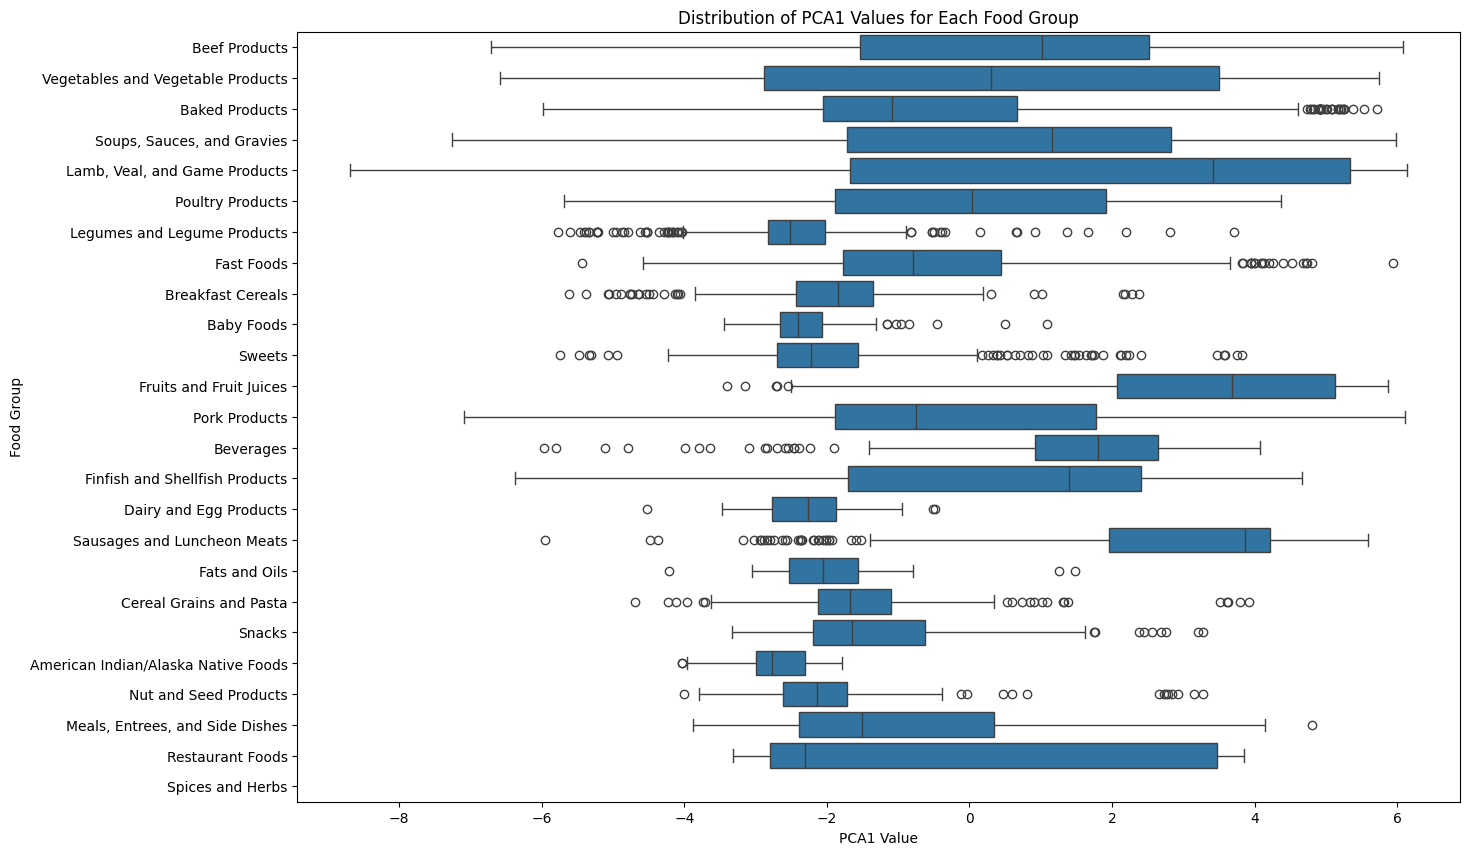

In [22]:
# Ensure matplotlib inline for Jupyter Notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Assume pca_df contains PCA transformed data and has a 'FoodGroup' column

# Add PCA1 values to the original dataframe
df['PCA1'] = pca_df['Component_1']

# Select the top 500 samples with the highest PCA1 values
top_500_pca1 = df.nlargest(500, 'PCA1')

# Plot the food group distribution for the top 500 samples
plt.figure(figsize=(10, 6))
sns.countplot(y='FoodGroup', data=top_500_pca1, order=top_500_pca1['FoodGroup'].value_counts().index)
plt.title('Food Group Distribution of Top 500 Samples with Highest PCA1 Values')
plt.xlabel('Count')
plt.ylabel('Food Group')
plt.show()

# Plot the distribution of PCA1 values for each food group
plt.figure(figsize=(15, 10))
sns.boxplot(x='PCA1', y='FoodGroup', data=df, order=df['FoodGroup'].value_counts().index)
plt.title('Distribution of PCA1 Values for Each Food Group')
plt.xlabel('PCA1 Value')
plt.ylabel('Food Group')
plt.show()


Do the same for pca2.

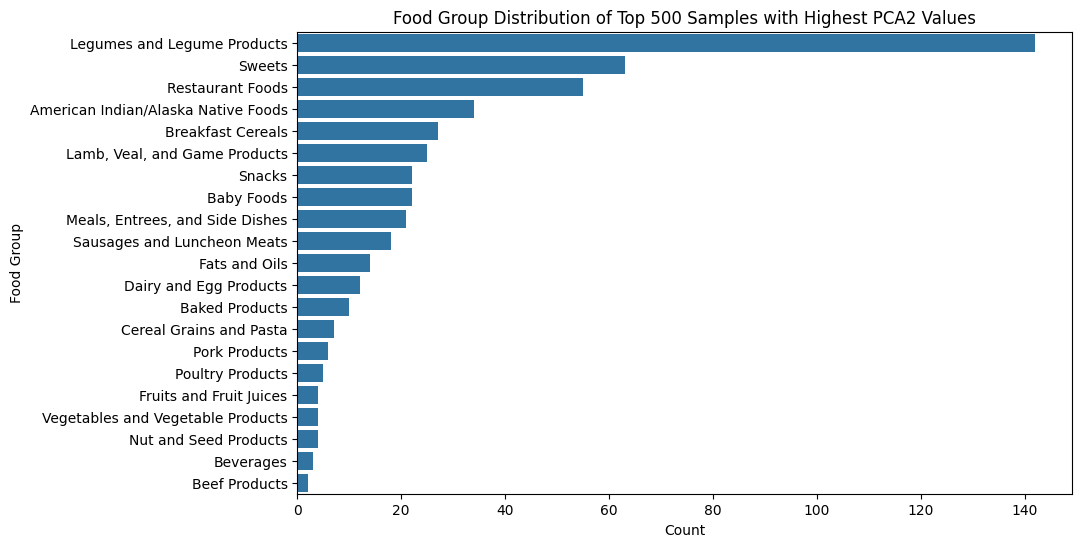

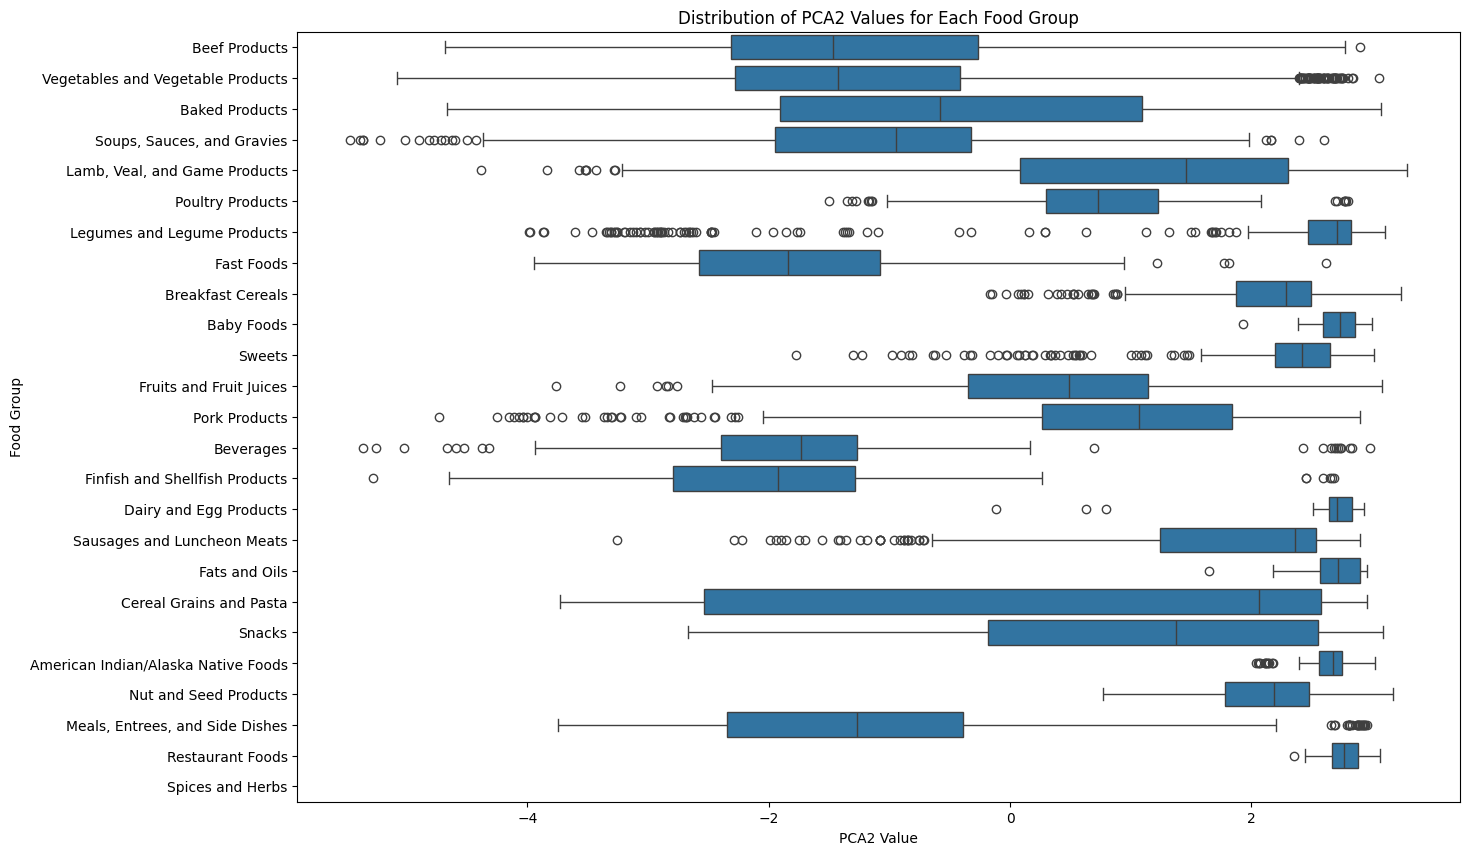

In [23]:
# Ensure matplotlib inline for Jupyter Notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Assume pca_df contains PCA transformed data and has a 'FoodGroup' column

# Add PCA1 values to the original dataframe
df['PCA2'] = pca_df['Component_2']

# Select the top 500 samples with the highest PCA1 values
top_500_pca2 = df.nlargest(500, 'PCA2')

# Plot the food group distribution for the top 500 samples
plt.figure(figsize=(10, 6))
sns.countplot(y='FoodGroup', data=top_500_pca2, order=top_500_pca2['FoodGroup'].value_counts().index)
plt.title('Food Group Distribution of Top 500 Samples with Highest PCA2 Values')
plt.xlabel('Count')
plt.ylabel('Food Group')
plt.show()

# Plot the distribution of PCA1 values for each food group
plt.figure(figsize=(15, 10))
sns.boxplot(x='PCA2', y='FoodGroup', data=df, order=df['FoodGroup'].value_counts().index)
plt.title('Distribution of PCA2 Values for Each Food Group')
plt.xlabel('PCA2 Value')
plt.ylabel('Food Group')
plt.show()


### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


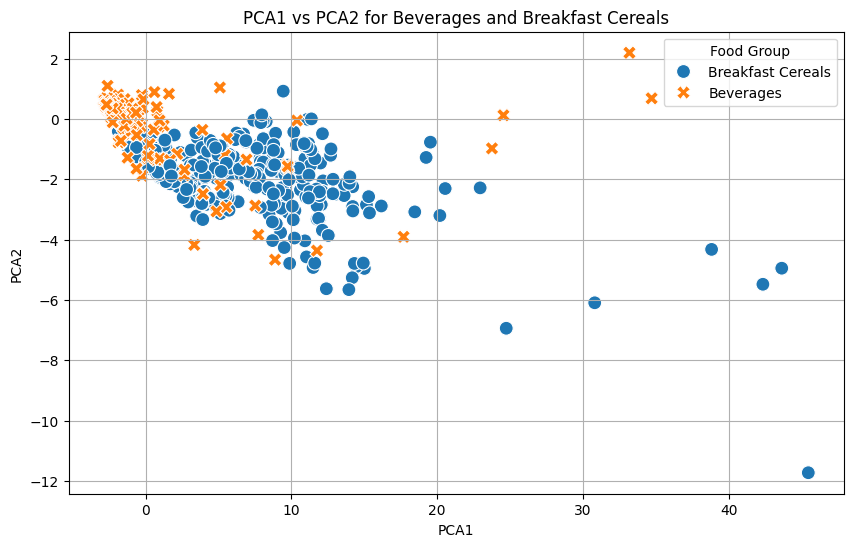

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Example: Load or prepare your main dataset (replace with your actual data loading)
df_main = numeric_df_no_id

# Step 1: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df_no_id)

# Step 2: Implement PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Create a new DataFrame with PCA1 and PCA2 values
df_pca_components = pd.DataFrame(data=df_pca[:, :2], columns=['PCA1', 'PCA2'], index=numeric_df_no_id.index)

# Add 'FoodGroup' and other necessary columns back to the DataFrame
df_main_with_pca = pd.concat([df_pca_components, df[['FoodGroup', 'ShortDescrip', 'Descrip']]], axis=1)

# Step 3: Filter data for 'Beverages' and 'Breakfast Cereals'
df_filtered = df_main_with_pca[df_main_with_pca['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

# Step 4: Plot PCA1 vs PCA2 for the filtered food groups
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='PCA1', y='PCA2', hue='FoodGroup', style='FoodGroup', s=100)
plt.title('PCA1 vs PCA2 for Beverages and Breakfast Cereals')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Food Group')
plt.grid(True)
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">From the plots in the last subsection (distributions), we can draw the following insights:

1. **Food Group Distribution Among Top PCA Values**:
    - By plotting the distribution of food groups for the top 500 samples with the highest PCA1 values, we can identify which food groups are most strongly associated with high PCA1 scores.
    - If certain food groups dominate the high PCA1 values, it suggests that these groups have specific nutritional profiles that strongly influence the first principal component. This can help in understanding the nutritional characteristics that are most variable or distinctive in these food groups.

2. **Distribution of PCA1 Values for Each Food Group**:
    - Plotting the distribution of PCA1 values for each food group allows us to see how different food groups are spread across the PCA1 spectrum.
    - Food groups with a wider spread of PCA1 values might have more nutritional variability within them, whereas food groups with a narrow spread might be more nutritionally uniform.
    - By comparing the distributions, we can also see if certain food groups consistently score higher or lower on PCA1, indicating that these groups are nutritionally distinct in the dimensions captured by PCA1.

3. **Insights into Nutritional Characteristics**:
    - The PCA1 and PCA2 components capture the most significant variance in the dataset. High PCA1 values may correspond to certain nutritional characteristics, such as high energy content, high protein, or specific vitamins and minerals.
    - Observing which food groups have high PCA1 values can provide insights into which nutrients are most influential for these groups.
    - Similarly, analyzing PCA2 values can offer additional insights into another set of nutritional characteristics, adding a layer of understanding to the nutritional profiles of different food groups.

4. **Identification of Unique Nutritional Profiles**:
    - If 'Beverages' and 'Breakfast Cereals' show distinct clustering in the PCA plots, it indicates that these food groups have unique nutritional profiles that set them apart from each other and from other food groups.
    - These unique profiles can be crucial for dietary planning, nutritional analysis, and food categorization based on nutritional content.

In summary, these plots help us understand the relationship between food groups and their nutritional characteristics as captured by the principal components, highlighting key differences and similarities across food categories.</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">The last plot and the distribution of PCA1 in each food group are related in the following ways:

### Distribution of PCA1 in Each Food Group

1. **Insight into Individual Food Groups**:
    - The distribution of PCA1 values for each food group gives a detailed look at how the nutritional characteristics (captured by PCA1) vary within each food group.
    - We can see the central tendency (mean or median), spread (variance or standard deviation), and any outliers within each food group.

2. **Nutritional Profiles**:
    - If a food group has a high average PCA1 value, it means that the foods within this group generally share the nutritional characteristics that PCA1 represents.
    - A wide distribution indicates a high variability in these characteristics within the food group, whereas a narrow distribution indicates more uniformity.

### Last Plot (PCA1 vs PCA2 for Specific Food Groups)

1. **Comparative Insight Across Food Groups**:
    - The scatter plot of PCA1 vs. PCA2 for specific food groups (e.g., 'Beverages' and 'Breakfast Cereals') provides a comparative view of how these food groups are positioned relative to each other in the PCA space.
    - Each point represents an individual food item, with its position indicating its PCA1 and PCA2 values.

2. **Cluster Identification**:
    - If 'Beverages' and 'Breakfast Cereals' form distinct clusters in the plot, it implies that the foods within each group are nutritionally similar to each other but different from foods in the other group.
    - Overlaps or separations between these clusters indicate the degree of similarity or difference in their nutritional profiles.

### Relationship Between the Two

1. **Consistency in Trends**:
    - The scatter plot should reflect the trends observed in the individual PCA1 distributions. For example, if 'Beverages' have a high and narrow PCA1 distribution, this should be evident in the scatter plot as a tight cluster of 'Beverages' points with high PCA1 values.
    - If 'Breakfast Cereals' have a wide PCA1 distribution, their points in the scatter plot would be more spread out along the PCA1 axis.

2. **Visual Confirmation**:
    - The distribution plots provide statistical insight, while the scatter plot visually confirms these insights by showing the actual data points.
    - This visual representation helps in identifying outliers or unique items within food groups that might not be as obvious in the distribution plots.

3. **Complementary Analysis**:
    - Together, these plots offer a comprehensive view: distribution plots provide a detailed breakdown within each food group, and the scatter plot offers an overall comparative view across selected food groups.
    - This dual approach helps in understanding both intra-group variability and inter-group differences in nutritional characteristics.

### Example Interpretation

- If the distribution plot shows that 'Beverages' generally have low PCA1 values and 'Breakfast Cereals' have high PCA1 values, the scatter plot should reflect this by showing 'Beverages' clustered towards the lower end of the PCA1 axis and 'Breakfast Cereals' towards the higher end.
- If there are overlaps, it indicates some nutritional similarities between the two groups, which might prompt a closer examination of the specific nutrients contributing to these similarities.

By analyzing both types of plots, we gain a deeper and more nuanced understanding of the nutritional landscape of the food groups.</span>

